In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import os
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
def RegressaoLinear(X, Y):
    # Reshaping vectors to columns, each row represent a sample
    X = X.reshape(-1, 1)
    Y = Y.reshape(-1, 1)

    # Creating the Regression Model
    regr = linear_model.LinearRegression()

    # Training de Model:
    regr.fit(X, Y)

    # Applying the Model into the Data:
    Y_Pred = regr.predict(X)
    Y_Pred = Y_Pred.reshape(1, -1)
    return Y_Pred[0]

<IPython.core.display.Javascript object>

In [ ]:
"""for CSV in os.listdir("FBREF/SerieA-Italia"):
    DF = pd.read_csv("FBREF/SerieA-Italia/" + CSV, sep=",")
    DF = DF[["Data", "Em casa", "Resultado", "Visitante", "Relatório da Partida"]]
    DF.dropna(inplace=True)
    DF["Data"] = DF.apply(
        lambda x: (datetime.datetime.strptime(x["Data"], "%Y-%m-%d")), axis=1
    )
    DF["Season"] = DF["Data"][0].year
    DF["home_goal"] = DF.apply(lambda x: int(x["Resultado"][0]), axis=1)
    DF["away_goal"] = DF.apply(lambda x: int(x["Resultado"][2]), axis=1)
    DF.reset_index(drop=True, inplace=True)
    DF.to_csv("FBREF/Clean/SerieA-Italia/" + CSV, sep=";", index=False)
    """

In [ ]:
"""DF = pd.read_csv(
    "FBREF/Clean/SerieA-Italia/" + os.listdir("FBREF/Clean/SerieA-Italia")[0], sep=";"
)
for CSV in os.listdir("FBREF/Clean/SerieA-Italia")[1::]:
    DF = pd.concat(
        [DF, pd.read_csv("FBREF/Clean/SerieA-Italia/" + CSV, sep=";")],
        ignore_index=True,
    )
DF.sort_values(by="Data", inplace=True, ignore_index=True)
DF.drop(labels="Resultado", axis="columns").to_csv(
    "FBREF/Clean/SerieA-Italia.csv", sep=";", index=False
)
DF"""

In [3]:
df_Games_Brasil = pd.read_csv("SerieA.csv", sep=";", index_col="Unnamed: 0")
df_Copa_Brasil = pd.read_csv("Kaggle/CopaBrasil.csv", sep=";", index_col="Unnamed: 0")
df_Libertadores = pd.read_csv(
    "Kaggle/Libertadores.csv", sep=";", index_col="Unnamed: 0"
)
df_SerieA_Italia = pd.read_csv("FBREF/Clean/SerieA-Italia.csv", sep=";")
df_Ligue1 = pd.read_csv("FBREF/Clean/Ligue1.csv", sep=";")
df_PremierLeague = pd.read_csv("FBREF/Clean/PremierLegue.csv", sep=";")
df_LaLiga = pd.read_csv("FBREF/Clean/LaLiga.csv", sep=";")

<IPython.core.display.Javascript object>

In [29]:
Europe_games = pd.read_csv("Kaggle/archive/games.csv")
Europe_games["date"] = Europe_games.apply(
    lambda x: (datetime.datetime.strptime(x["date"], "%Y-%m-%d")), axis=1
)

<IPython.core.display.Javascript object>

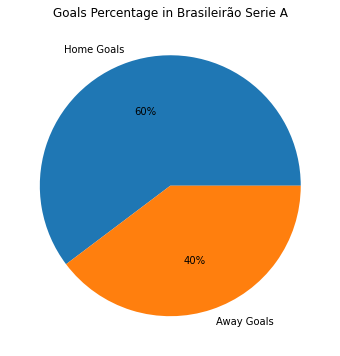

<IPython.core.display.Javascript object>

In [22]:
Goals = df_Games_Brasil[["gols_man", "gols_vis"]]
label = ["Home Goals", "Away Goals"]

fig = plt.figure(figsize=(6, 6))
plt.title("Goals Percentage in Brasileirão Serie A")
plt.pie(Goals.sum().values, labels=label, autopct="%.0f%%")
plt.show()

In [18]:
gols_per_year = (
    df_Games_Brasil[["ano_campeonato", "gols_man", "gols_vis"]]
    .groupby(["ano_campeonato"])
    .mean()
)
label = [
    "Linear Regression: Home",
    "Linear Regression: Away",
    "Home Goals",
    "Away Goals",
]

<IPython.core.display.Javascript object>

In [19]:
# Selecting Variables to the Regression
##Home:
X_Home = gols_per_year.index.values
Y_Home = gols_per_year["gols_man"].values

##Away:
X_Away = gols_per_year.index.values
Y_Away = gols_per_year["gols_vis"].values

# Regression Function:
Y_Home_Pred = RegressaoLinear(X_Home, Y_Home)
Y_Away_Pred = RegressaoLinear(X_Away, Y_Away)

<IPython.core.display.Javascript object>

Home Mean Squared Error: 0.0038
Away Mean Squared Error: 0.0093
Home R²: 0.81
Away R²: 0.38


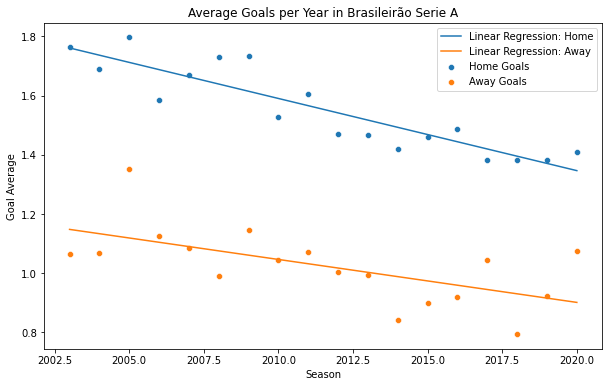

<IPython.core.display.Javascript object>

In [20]:
fig = plt.figure(figsize=(10, 6))

plt.title("Average Goals per Year in Brasileirão Serie A")
plt.xlabel("Season")
plt.ylabel("Goal Average")


print("Home Mean Squared Error: %.4f" % mean_squared_error(Y_Home, Y_Home_Pred))
print("Away Mean Squared Error: %.4f" % mean_squared_error(Y_Away, Y_Away_Pred))

print("Home R²: %.2f" % r2_score(Y_Home, Y_Home_Pred))
print("Away R²: %.2f" % r2_score(Y_Away, Y_Away_Pred))


plt.plot(X_Home, Y_Home_Pred)
plt.plot(X_Away, Y_Away_Pred)
sns.scatterplot(data=gols_per_year, x=gols_per_year.index, y="gols_man")
sns.scatterplot(data=gols_per_year, x=gols_per_year.index, y="gols_vis")
plt.legend(label)
plt.show()

In [21]:
gols_per_year_Libertadores = (
    df_Libertadores[["season", "home_goal", "away_goal"]].groupby(["season"]).mean()
)
label = [
    "Linear Regression: Home",
    "Linear Regression: Away",
    "Home Goals",
    "Away Goals",
]

<IPython.core.display.Javascript object>

In [22]:
#Selecting Variables to the Regression
##Home:
X_Home = (gols_per_year_Libertadores.index.values)
Y_Home = (gols_per_year_Libertadores["home_goal"].values)
##Away:
X_Away = (gols_per_year_Libertadores.index.values)
Y_Away = (gols_per_year_Libertadores["away_goal"].values)

#Regression Function:
Y_Home_Pred = RegressaoLinear(X_Home, Y_Home)
Y_Away_Pred = RegressaoLinear(X_Away, Y_Away)


<IPython.core.display.Javascript object>

Home Mean Squared Error: 0.0120
Away Mean Squared Error: 0.0071
Home R²: 0.06
Away R²: 0.02


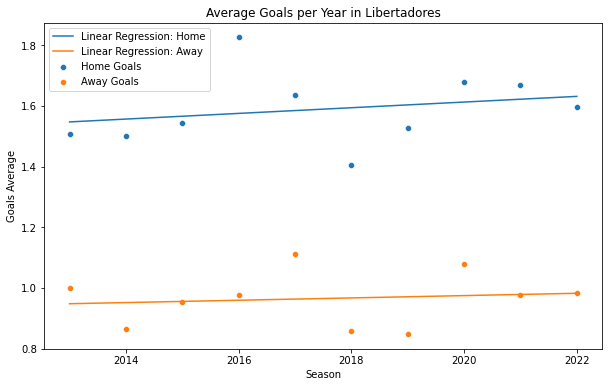

<IPython.core.display.Javascript object>

In [23]:
fig = plt.figure(figsize=(10, 6))

plt.title("Average Goals per Year in Libertadores")
plt.xlabel("Season")
plt.ylabel("Goals Average")

print("Home Mean Squared Error: %.4f" % mean_squared_error(Y_Home, Y_Home_Pred))
print("Away Mean Squared Error: %.4f" % mean_squared_error(Y_Away, Y_Away_Pred))

print("Home R²: %.2f" % r2_score(Y_Home, Y_Home_Pred))
print("Away R²: %.2f" % r2_score(Y_Away, Y_Away_Pred))


plt.plot(X_Home, Y_Home_Pred)
plt.plot(X_Away, Y_Away_Pred)
sns.scatterplot(
    data=gols_per_year_Libertadores, x=gols_per_year_Libertadores.index, y="home_goal"
)
sns.scatterplot(
    data=gols_per_year_Libertadores, x=gols_per_year_Libertadores.index, y="away_goal"
)
plt.legend(label)
plt.show()

In [24]:
gols_per_year_CopaBrasil = (
    df_Copa_Brasil[["season", "home_goal", "away_goal"]].groupby(["season"]).mean()
)
label = [
    "Linear Regression: Home",
    "Linear Regression: Away",
    "Home Goals",
    "Away Goals",
]

<IPython.core.display.Javascript object>

In [25]:
# Selecting Variables to the Regression
##Home:
X_Home = gols_per_year_CopaBrasil.index.values
Y_Home = gols_per_year_CopaBrasil["home_goal"].values
##Away:
X_Away = gols_per_year_CopaBrasil.index.values
Y_Away = gols_per_year_CopaBrasil["away_goal"].values
# Regression Function:
Y_Home_Pred = RegressaoLinear(X_Home, Y_Home)
Y_Away_Pred = RegressaoLinear(X_Away, Y_Away)

<IPython.core.display.Javascript object>

Home Mean Squared Error: 0.0092
Away Mean Squared Error: 0.0104
Home R²: 0.72
Away R²: 0.00


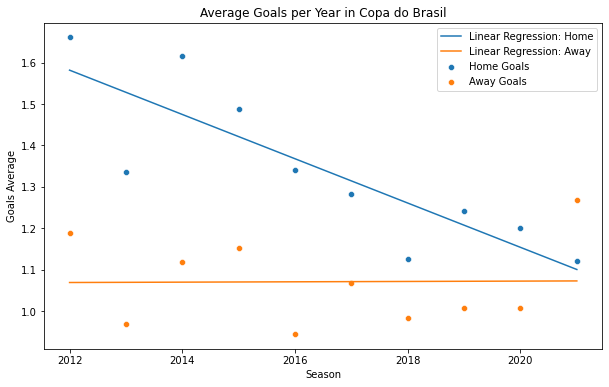

<IPython.core.display.Javascript object>

In [26]:
fig = plt.figure(figsize=(10, 6))

plt.title("Average Goals per Year in Copa do Brasil")
plt.xlabel("Season")
plt.ylabel("Goals Average")

print("Home Mean Squared Error: %.4f" % mean_squared_error(Y_Home, Y_Home_Pred))
print("Away Mean Squared Error: %.4f" % mean_squared_error(Y_Away, Y_Away_Pred))

print("Home R²: %.2f" % r2_score(Y_Home, Y_Home_Pred))
print("Away R²: %.2f" % r2_score(Y_Away, Y_Away_Pred))


plt.plot(X_Home.reshape(-1, 1), Y_Home_Pred.reshape(-1, 1))
plt.plot(X_Away.reshape(-1, 1), Y_Away_Pred.reshape(-1, 1))
sns.scatterplot(
    data=gols_per_year_CopaBrasil, x=gols_per_year_CopaBrasil.index, y="home_goal"
)
sns.scatterplot(
    data=gols_per_year_CopaBrasil, x=gols_per_year_CopaBrasil.index, y="away_goal"
)
plt.legend(label)
plt.show()

In [30]:
gols_per_year_Europe = (
    Europe_games[["season", "home_club_goals", "away_club_goals"]]
    .groupby(["season"])
    .mean()
)
label = [
    "Linear Regression: Home",
    "Linear Regression: Away",
    "Home Goals",
    "Away Goals",
]


<IPython.core.display.Javascript object>

In [31]:
# Selecting Regression Variables
##Home:
X_Home = gols_per_year_Europe.index.values
Y_Home = gols_per_year_Europe["home_club_goals"].values
##Away:
X_Away = gols_per_year_Europe.index.values
Y_Away = gols_per_year_Europe["away_club_goals"].values
# Regression Function:
Y_Home_Pred = RegressaoLinear(X_Home, Y_Home)
Y_Away_Pred = RegressaoLinear(X_Away, Y_Away)

<IPython.core.display.Javascript object>

Home Mean Squared Error: 0.0030
Away Mean Squared Error: 0.0017
Home R²: 0.01
Away R²: 0.72


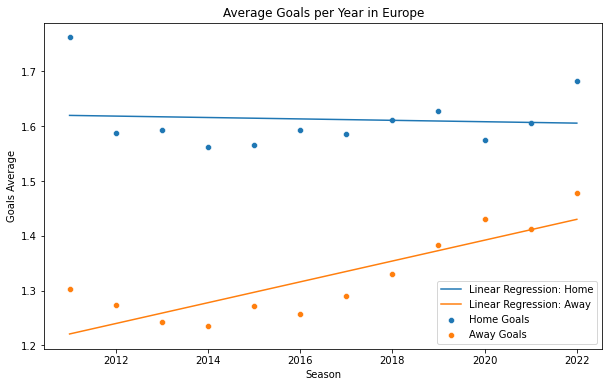

<IPython.core.display.Javascript object>

In [32]:
fig = plt.figure(figsize=(10, 6))

plt.title("Average Goals per Year in Europe")
plt.xlabel("Season")
plt.ylabel("Goals Average")

print("Home Mean Squared Error: %.4f" % mean_squared_error(Y_Home, Y_Home_Pred))
print("Away Mean Squared Error: %.4f" % mean_squared_error(Y_Away, Y_Away_Pred))

print("Home R²: %.2f" % r2_score(Y_Home, Y_Home_Pred))
print("Away R²: %.2f" % r2_score(Y_Away, Y_Away_Pred))


plt.plot(X_Home, Y_Home_Pred)
plt.plot(X_Away, Y_Away_Pred)
sns.scatterplot(
    data=gols_per_year_Europe, x=gols_per_year_Europe.index, y="home_club_goals"
)
sns.scatterplot(
    data=gols_per_year_Europe, x=gols_per_year_Europe.index, y="away_club_goals"
)
plt.legend(label)
plt.show()

In [5]:
df_SerieA_Italia.columns

Index(['Data', 'Em casa', 'Visitante', 'Relatório da Partida', 'Season',
       'home_goal', 'away_goal'],
      dtype='object')

<IPython.core.display.Javascript object>

In [6]:
gols_per_year_Italia = (
    df_SerieA_Italia[["Season", "home_goal", "away_goal"]]
    .groupby(["Season"])
    .mean()
)
label = [
    "Linear Regression: Home",
    "Linear Regression: Away",
    "Home Goals",
    "Away Goals",
]


<IPython.core.display.Javascript object>

In [33]:
# Selecting Regression Variables
##Home:
X_Home = gols_per_year_Italia.index.values
Y_Home = gols_per_year_Italia["home_goal"].values
##Away:
X_Away = gols_per_year_Italia.index.values
Y_Away = gols_per_year_Italia["away_goal"].values
# Regression Function:
Y_Home_Pred = RegressaoLinear(X_Home, Y_Home)
Y_Away_Pred = RegressaoLinear(X_Away, Y_Away)

<IPython.core.display.Javascript object>

Home Mean Squared Error: 0.0029
Away Mean Squared Error: 0.0049
Home R²: 0.16
Away R²: 0.63


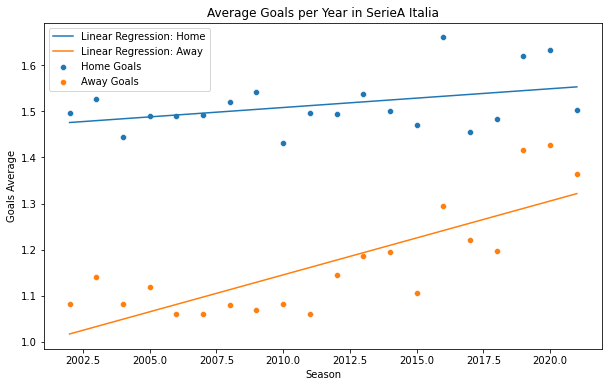

<IPython.core.display.Javascript object>

In [34]:
fig = plt.figure(figsize=(10, 6))

plt.title("Average Goals per Year in SerieA Italia")
plt.xlabel("Season")
plt.ylabel("Goals Average")

print("Home Mean Squared Error: %.4f" % mean_squared_error(Y_Home, Y_Home_Pred))
print("Away Mean Squared Error: %.4f" % mean_squared_error(Y_Away, Y_Away_Pred))

print("Home R²: %.2f" % r2_score(Y_Home, Y_Home_Pred))
print("Away R²: %.2f" % r2_score(Y_Away, Y_Away_Pred))


plt.plot(X_Home, Y_Home_Pred)
plt.plot(X_Away, Y_Away_Pred)
sns.scatterplot(data=gols_per_year_Italia, x=gols_per_year_Italia.index, y="home_goal")
sns.scatterplot(data=gols_per_year_Italia, x=gols_per_year_Italia.index, y="away_goal")
plt.legend(label)
plt.show()

In [35]:
gols_per_year_Ligue1 = (
    df_Ligue1[["Season", "home_goal", "away_goal"]].groupby(["Season"]).mean()
)
label = [
    "Linear Regression: Home",
    "Linear Regression: Away",
    "Home Goals",
    "Away Goals",
]

<IPython.core.display.Javascript object>

In [36]:
# Selecting Regression Variables
##Home:
X_Home = gols_per_year_Ligue1.index.values
Y_Home = gols_per_year_Ligue1["home_goal"].values
##Away:
X_Away = gols_per_year_Ligue1.index.values
Y_Away = gols_per_year_Ligue1["away_goal"].values
# Regression Function:
Y_Home_Pred = RegressaoLinear(X_Home, Y_Home)
Y_Away_Pred = RegressaoLinear(X_Away, Y_Away)

<IPython.core.display.Javascript object>

Home Mean Squared Error: 0.0030
Away Mean Squared Error: 0.0037
Home R²: 0.57
Away R²: 0.77


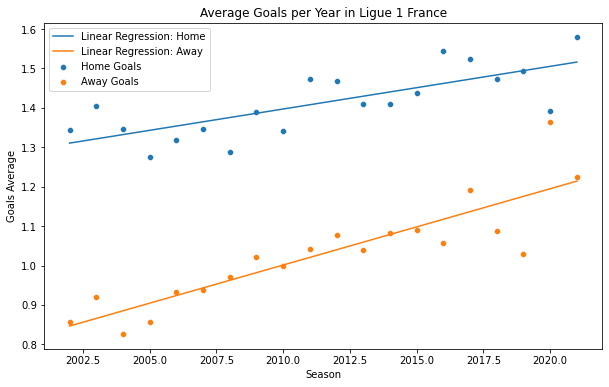

<IPython.core.display.Javascript object>

In [37]:
fig = plt.figure(figsize=(10, 6))

plt.title("Average Goals per Year in Ligue 1 France")
plt.xlabel("Season")
plt.ylabel("Goals Average")

print("Home Mean Squared Error: %.4f" % mean_squared_error(Y_Home, Y_Home_Pred))
print("Away Mean Squared Error: %.4f" % mean_squared_error(Y_Away, Y_Away_Pred))

print("Home R²: %.2f" % r2_score(Y_Home, Y_Home_Pred))
print("Away R²: %.2f" % r2_score(Y_Away, Y_Away_Pred))


plt.plot(X_Home, Y_Home_Pred)
plt.plot(X_Away, Y_Away_Pred)
sns.scatterplot(data=gols_per_year_Ligue1, x=gols_per_year_Ligue1.index, y="home_goal")
sns.scatterplot(data=gols_per_year_Ligue1, x=gols_per_year_Ligue1.index, y="away_goal")
plt.legend(label)
plt.show()

In [12]:
gols_per_year_Premier = (
    df_PremierLeague[["Season", "home_goal", "away_goal"]].groupby(["Season"]).mean()
)
label = [
    "Linear Regression: Home",
    "Linear Regression: Away",
    "Home Goals",
    "Away Goals",
]

<IPython.core.display.Javascript object>

In [13]:
# Selecting Regression Variables
##Home:
X_Home = gols_per_year_Premier.index.values
Y_Home = gols_per_year_Premier["home_goal"].values
##Away:
X_Away = gols_per_year_Premier.index.values
Y_Away = gols_per_year_Premier["away_goal"].values
# Regression Function:
Y_Home_Pred = RegressaoLinear(X_Home, Y_Home)
Y_Away_Pred = RegressaoLinear(X_Away, Y_Away)

<IPython.core.display.Javascript object>

Home Mean Squared Error: 0.0057
Away Mean Squared Error: 0.0035
Home R²: 0.00
Away R²: 0.55


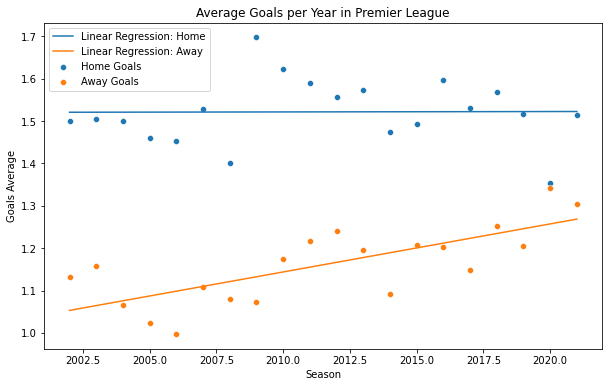

<IPython.core.display.Javascript object>

In [15]:
fig = plt.figure(figsize=(10, 6))

plt.title("Average Goals per Year in Premier League")
plt.xlabel("Season")
plt.ylabel("Goals Average")

print("Home Mean Squared Error: %.4f" % mean_squared_error(Y_Home, Y_Home_Pred))
print("Away Mean Squared Error: %.4f" % mean_squared_error(Y_Away, Y_Away_Pred))

print("Home R²: %.2f" % r2_score(Y_Home, Y_Home_Pred))
print("Away R²: %.2f" % r2_score(Y_Away, Y_Away_Pred))


plt.plot(X_Home, Y_Home_Pred)
plt.plot(X_Away, Y_Away_Pred)
sns.scatterplot(
    data=gols_per_year_Premier, x=gols_per_year_Premier.index, y="home_goal"
)
sns.scatterplot(
    data=gols_per_year_Premier, x=gols_per_year_Premier.index, y="away_goal"
)
plt.legend(label)
plt.show()

In [40]:
gols_per_year_LaLiga = (
    df_LaLiga[["Season", "home_goal", "away_goal"]].groupby(["Season"]).mean()
)
label = [
    "Linear Regression: Home",
    "Linear Regression: Away",
    "Home Goals",
    "Away Goals",
]

<IPython.core.display.Javascript object>

In [41]:
# Selecting Regression Variables
##Home:
X_Home = gols_per_year_LaLiga.index.values
Y_Home = gols_per_year_LaLiga["home_goal"].values
##Away:
X_Away = gols_per_year_LaLiga.index.values
Y_Away = gols_per_year_LaLiga["away_goal"].values
# Regression Function:
Y_Home_Pred = RegressaoLinear(X_Home, Y_Home)
Y_Away_Pred = RegressaoLinear(X_Away, Y_Away)

<IPython.core.display.Javascript object>

Home Mean Squared Error: 0.0110
Away Mean Squared Error: 0.0030
Home R²: 0.01
Away R²: 0.00


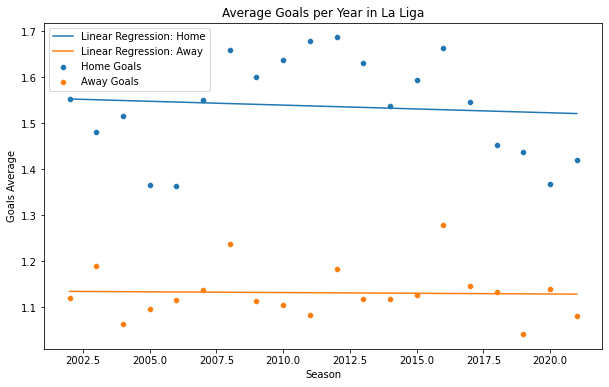

<IPython.core.display.Javascript object>

In [42]:
fig = plt.figure(figsize=(10, 6))

plt.title("Average Goals per Year in La Liga")
plt.xlabel("Season")
plt.ylabel("Goals Average")

print("Home Mean Squared Error: %.4f" % mean_squared_error(Y_Home, Y_Home_Pred))
print("Away Mean Squared Error: %.4f" % mean_squared_error(Y_Away, Y_Away_Pred))

print("Home R²: %.2f" % r2_score(Y_Home, Y_Home_Pred))
print("Away R²: %.2f" % r2_score(Y_Away, Y_Away_Pred))


plt.plot(X_Home, Y_Home_Pred)
plt.plot(X_Away, Y_Away_Pred)
sns.scatterplot(data=gols_per_year_LaLiga, x=gols_per_year_LaLiga.index, y="home_goal")
sns.scatterplot(data=gols_per_year_LaLiga, x=gols_per_year_LaLiga.index, y="away_goal")
plt.legend(label)
plt.show()